# Introducción

Una breve descripción del dataset, si hace falta.

# Carga de datos y corrección de tipos

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Ajustar según lo necesario
df = pd.read_csv('test-datasets/carRisk.csv')
df.head()

,age,cartype,risk
0,20,combi,high
1,18,sport,high
2,40,sport,high
3,50,family,low
4,35,minivan,low


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   age      720 non-null    int64 
 1   cartype  720 non-null    object
 2   risk     720 non-null    object
dtypes: int64(1), object(2)
memory usage: 17.0+ KB


# Corrección de tipos de datos

In [4]:
# Esto debería ser suficiente
object_columns = [col for col in df.columns if df[col].dtype == "object"]

for col in object_columns:
    df[col] = df[col].astype("category")
    print(f"df[{col}]: {df[col].unique()}")

df[cartype]: ['combi', 'sport', 'family', 'minivan']
Categories (4, object): ['combi', 'family', 'minivan', 'sport']
df[risk]: ['high', 'low']
Categories (2, object): ['high', 'low']


# Descripción estadística de los datos

In [5]:
df.describe()

,age
count,720.000000
mean,33.125000
std,9.974847
min,18.000000
25%,27.500000
50%,33.500000
75%,40.000000
max,50.000000


## Histogramas

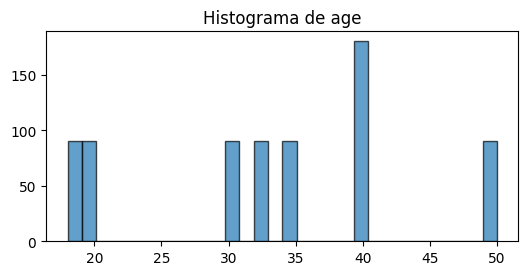

In [16]:
num_cols = df.select_dtypes(include=[np.number]).columns

plt.figure(figsize=(20, 25))
for i, column in enumerate(numeric_columns):
    plt.subplot(10, 4, i + 1)
    plt.hist(df[column].dropna(), bins=30, alpha=0.7, edgecolor='black')
    plt.title(f'Histograma de {column}')
    plt.tight_layout()
plt.show()

## Boxplots

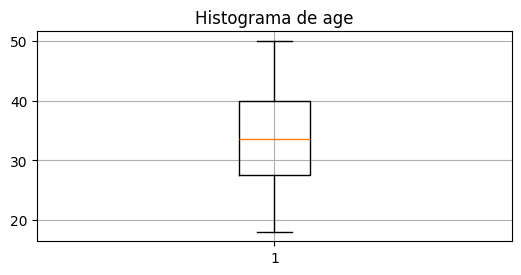

In [17]:
plt.figure(figsize=(20, 25))
for i, column in enumerate(numeric_columns):
    plt.subplot(10, 4, i + 1)
    plt.boxplot(df[column].dropna())
    plt.grid()
    plt.title(f'Histograma de {column}')
    plt.tight_layout()
plt.show()

## Gráficos de barras

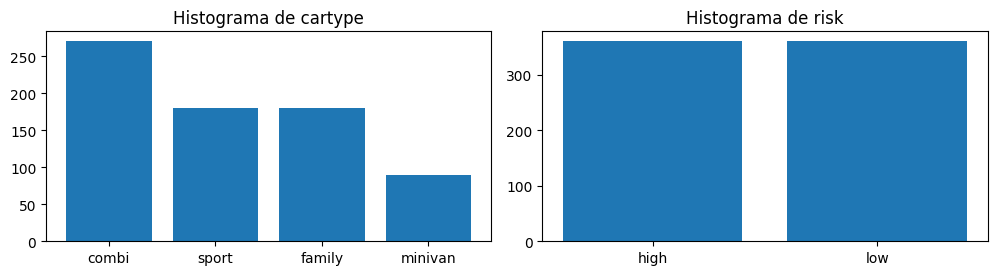

In [23]:
plt.figure(figsize=(20, 25))
for i, column in enumerate(object_columns):
    plt.subplot(10, 4, i + 1)
    plt.bar(df[column].unique(), df[column].value_counts())
    plt.title(f'Histograma de {column}')
    plt.tight_layout()
plt.show()

# Limpieza de atípicos

## Variables cuantitativas

Para el caso de que solo sea necesario imputar una variable, se puede usar el código

```python
col = ""

Q1 = df[col].quantile(0.25)
Q3 = df[col].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df[col] = np.where((df[col] < lower_bound) | (df[col] > upper_bound), np.nan, df[col])
```

De todos modos, el código suministrado abajo con el for debería ser suficiente.

In [24]:
for col in numeric_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[col] = np.where((df[col] < lower_bound) | (df[col] > upper_bound), np.nan, df[col])

Imputando con la media,

In [ ]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
df.apply()
df[["Edad_al_momento_de_graduarse"]] = imputer.fit_transform(df[["Edad_al_momento_de_graduarse"]])
df.info()

In [ ]:
df["Edad_al_momento_de_graduarse"].plot(kind="box")

In [ ]:
columns = ["Sexo", "Area_del_Conocimiento", "Dominio_2do_idioma"]

for col in columns:
  df[col].fillna(df[col].mode()[0], inplace=True)
  print(df[col].value_counts())
  print("-"*30)

## Transformaciones de datos

La variable objetivo en este caso es `Encuentra_trabajo`, por lo que las demás variables se considerarán predictoras.

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df["Encuentra_trabajo"] = le.fit_transform(df["Encuentra_trabajo"])
df["Encuentra_trabajo"].unique()

In [ ]:
df = pd.get_dummies(df, columns=["Sexo", "Area_del_Conocimiento", "Conocimientos_basicos_de_informatica", "Dominio_2do_idioma"], drop_first=True, dtype="int64")
df.head()

In [ ]:
df.info()